In [7]:
#Identificación de la fuente de datos
import os
import glob

# Directorio donde están los archivos CSV
directorio = "/content/data/"

# Obtener la lista de archivos CSV
archivos_csv = glob.glob(os.path.join(directorio, "*.csv"))

# Mostrar los archivos encontrados
print("Archivos CSV encontrados:")
for archivo in archivos_csv:
    print(archivo)


Archivos CSV encontrados:
/content/data/Potencia_compresores(in).csv
/content/data/data_dos_compresores.csv


In [32]:
import pandas as pd

# Ruta del archivo CSV
archivo = "/content/data/data_dos_compresores.csv"

# Cargar el archivo con el separador correcto ";"
df_nuevo = pd.read_csv(archivo, sep=";", engine="python")

# Mostrar las primeras filas para verificar la correcta lectura
#df_nuevo.head()

# Verificar la estructura del DataFrame
df_nuevo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697779 entries, 0 to 697778
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          697779 non-null  object 
 1   name          697779 non-null  object 
 2   altered_data  697779 non-null  float64
dtypes: float64(1), object(2)
memory usage: 16.0+ MB


In [33]:
# Mostrar las primeras filas
print("\nPrimeras filas del DataFrame:")
df_nuevo.head()



Primeras filas del DataFrame:


,Date,name,altered_data
0,2025-01-12 04:01:00-01:00,vpm-12-pressure-psi,2.935436e+00
1,2025-01-12 04:01:00-01:00,vpm-14-temperature,3.848284e+01
2,2025-01-12 04:01:00-01:00,vpm-14-totalizer-mscf,7.051506e+07
3,2025-01-12 04:01:00-01:00,vpm-12-totalizer-mscf,5.424777e+07
4,2025-01-12 04:01:00-01:00,vpm-12-flow-scfm,1.003991e+04


In [34]:
# Mostrar estadísticas descriptivas de columnas numéricas
print("\nEstadísticas descriptivas de columnas numéricas:")
df_nuevo.describe()



Estadísticas descriptivas de columnas numéricas:


,altered_data
count,6.977790e+05
mean,1.717842e+07
std,3.008437e+07
min,-3.396408e+00
25%,7.251770e+00
50%,4.695287e+01
75%,2.713020e+07
max,8.324494e+07


In [35]:
# Verificar valores nulos por columna
print("\nValores nulos por columna:")
df_nuevo.isnull().sum()



Valores nulos por columna:


,0
Date,0
name,0
altered_data,0


In [36]:

# Mostrar la cantidad de valores únicos por columna
print("\nCantidad de valores únicos por columna:")
df_nuevo.nunique()


Cantidad de valores únicos por columna:


,0
Date,87235
name,8
altered_data,697779


In [37]:
# Identificar columnas con datos de tipo texto y mostrar valores únicos en ellas
columnas_texto = df_nuevo.select_dtypes(include=["object"]).columns
for col in columnas_texto:
    print(f"\nValores únicos en la columna '{col}':")
    print(df_nuevo[col].unique()[:10])  # Muestra solo los primeros 10 valores únicos para evitar exceso de salida



Valores únicos en la columna 'Date':
['2025-01-12 04:01:00-01:00' '2025-01-12 04:02:00-01:00'
 '2025-01-12 04:03:00-01:00' '2025-01-12 04:04:00-01:00'
 '2025-01-12 04:05:00-01:00' '2025-01-12 04:06:00-01:00'
 '2025-01-12 04:07:00-01:00' '2025-01-12 04:08:00-01:00'
 '2025-01-12 04:09:00-01:00' '2025-01-12 04:10:00-01:00']

Valores únicos en la columna 'name':
['vpm-12-pressure-psi' 'vpm-14-temperature' 'vpm-14-totalizer-mscf'
 'vpm-12-totalizer-mscf' 'vpm-12-flow-scfm' 'vpm-14-flow-scfm'
 'vpm-14-pressure-psi' 'vpm-12-temperature']


Exception ignored in: <function ZipFile.__del__ at 0x7e8c4febe160>
Traceback (most recent call last):
  File "/usr/lib/python3.11/zipfile.py", line 1895, in __del__
    self.close()
  File "/usr/lib/python3.11/zipfile.py", line 1912, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697779 entries, 0 to 697778
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          697779 non-null  object 
 1   name          697779 non-null  object 
 2   altered_data  697779 non-null  float64
dtypes: float64(1), object(2)
memory usage: 16.0+ MB


<ipython-input-78-f469941d8d89>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_nuevo["name"], order=sensor_counts.index, palette="viridis")


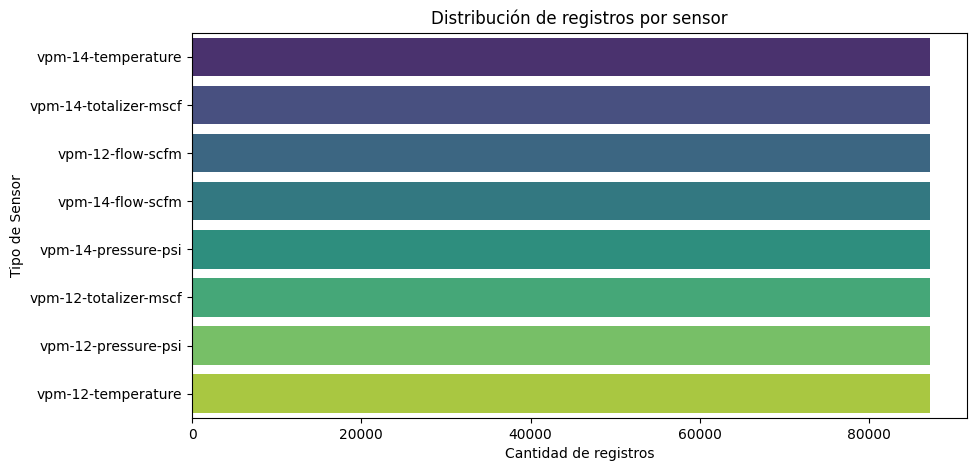

(None,
        altered_data
 count  6.977790e+05
 mean   1.717842e+07
 std    3.008437e+07
 min   -3.396408e+00
 25%    7.251770e+00
 50%    4.695287e+01
 75%    2.713020e+07
 max    8.324494e+07,
 Date            0
 name            0
 altered_data    0
 dtype: int64,
 name
 vpm-14-temperature       87223
 vpm-14-totalizer-mscf    87223
 vpm-12-flow-scfm         87223
 vpm-14-flow-scfm         87223
 vpm-14-pressure-psi      87223
 vpm-12-totalizer-mscf    87222
 vpm-12-pressure-psi      87221
 vpm-12-temperature       87221
 Name: count, dtype: int64,
 Empty DataFrame
 Columns: []
 Index: [])

In [78]:
#Libs para graficación de cara al EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = "/content/data/data_dos_compresores.csv"
df_nuevo = pd.read_csv(file_path, sep=";", engine="python")

# Información general del dataset
info_general = df_nuevo.info()
estadisticas_descriptivas = df_nuevo.describe()

# Detección de valores nulos
valores_nulos = df_nuevo.isnull().sum()

# Distribución de datos por sensor
sensor_counts = df_nuevo["name"].value_counts()

# Identificación de outliers usando IQR
def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

# Aplicar detección de outliers si existe la columna "value"
if "value" in df_nuevo.columns:
    outliers_df = detectar_outliers_iqr(df_nuevo, "value")
else:
    outliers_df = pd.DataFrame()  # Si no hay "value", no hay outliers que analizar

# Visualización de la distribución de valores por sensor
plt.figure(figsize=(10, 5))
sns.countplot(y=df_nuevo["name"], order=sensor_counts.index, palette="viridis")
plt.title("Distribución de registros por sensor")
plt.xlabel("Cantidad de registros")
plt.ylabel("Tipo de Sensor")
plt.show()

# Matriz de correlación si hay columnas numéricas suficientes
if df_nuevo.select_dtypes(include=['number']).shape[1] > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_nuevo.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación")
    plt.show()

# Resultados clave
info_general, estadisticas_descriptivas, valores_nulos, sensor_counts, outliers_df.head()


In [38]:
import pandas as pd

# Ruta del archivo CSV
archivo2 = "/content/data/Potencia_compresores(in).csv"

# Cargar el archivo con el separador correcto ";"
df_nuevo2 = pd.read_csv(archivo2, sep=";", engine="python")

# Mostrar las primeras filas para verificar la correcta lectura
#df_nuevo.head()

# Verificar la estructura del DataFrame
df_nuevo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42952 entries, 0 to 42951
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              42952 non-null  int64 
 1   datetime                42952 non-null  object
 2   potencia-compresor-CB1  42448 non-null  object
 3   potencia-compresor-CB2  42378 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [39]:
# Mostrar las primeras filas
print("\nPrimeras filas del DataFrame:")
df_nuevo2.head()


Primeras filas del DataFrame:


,Unnamed: 0,datetime,potencia-compresor-CB1,potencia-compresor-CB2
0,0,2025-01-11 00:00:00-05:00,17.157.770.635.165.900,1.689.745.646.821.970
1,1,2025-01-11 00:02:00-05:00,17.185.387.552.979.700,17.108.961.352.091.500
2,2,2025-01-11 00:04:00-05:00,17.089.802.368.230.500,168.955.142.492.382
3,3,2025-01-11 00:06:00-05:00,17.112.840.087.891.600,16.983.252.549.754.700
4,4,2025-01-11 00:08:00-05:00,17.171.828.798.216.500,16.935.833.294.541.800


In [40]:
# Mostrar estadísticas descriptivas de columnas numéricas
print("\nEstadísticas descriptivas de columnas numéricas:")
df_nuevo2.describe()


Estadísticas descriptivas de columnas numéricas:


,Unnamed: 0
count,42952.000000
mean,21475.500000
std,12399.318718
min,0.000000
25%,10737.750000
50%,21475.500000
75%,32213.250000
max,42951.000000


In [41]:
# Verificar valores nulos por columna
print("\nValores nulos por columna:")
df_nuevo2.isnull().sum()


Valores nulos por columna:


,0
Unnamed: 0,0
datetime,0
potencia-compresor-CB1,504
potencia-compresor-CB2,574


In [42]:
# Mostrar la cantidad de valores únicos por columna
print("\nCantidad de valores únicos por columna:")
df_nuevo2.nunique()


Cantidad de valores únicos por columna:


,0
Unnamed: 0,42952
datetime,42952
potencia-compresor-CB1,42448
potencia-compresor-CB2,42378


In [43]:
# Identificar columnas con datos de tipo texto y mostrar valores únicos en ellas
columnas_texto = df_nuevo2.select_dtypes(include=["object"]).columns
for col in columnas_texto:
    print(f"\nValores únicos en la columna '{col}':")
    print(df_nuevo2[col].unique()[:10])  # Muestra solo los primeros 10 valores únicos para evitar exceso de salida


Valores únicos en la columna 'datetime':
['2025-01-11 00:00:00-05:00' '2025-01-11 00:02:00-05:00'
 '2025-01-11 00:04:00-05:00' '2025-01-11 00:06:00-05:00'
 '2025-01-11 00:08:00-05:00' '2025-01-11 00:10:00-05:00'
 '2025-01-11 00:12:00-05:00' '2025-01-11 00:14:00-05:00'
 '2025-01-11 00:16:00-05:00' '2025-01-11 00:18:00-05:00']

Valores únicos en la columna 'potencia-compresor-CB1':
['17.157.770.635.165.900' '17.185.387.552.979.700'
 '17.089.802.368.230.500' '17.112.840.087.891.600'
 '17.171.828.798.216.500' '17.259.324.259.953.200' '1.723.543.742.709.930'
 '1.708.519.472.601.730' '17.132.074.260.022.100' '17.157.602.737.460.400']

Valores únicos en la columna 'potencia-compresor-CB2':
['1.689.745.646.821.970' '17.108.961.352.091.500' '168.955.142.492.382'
 '16.983.252.549.754.700' '16.935.833.294.541.800'
 '17.264.299.072.545.600' '16.929.697.777.154.600'
 '16.950.773.915.802.000' '16.925.668.910.714.200' '1.734.940.751.879.980']


In [45]:
df_nuevo2.columns.values[0] = "IdRegistro"
df_nuevo2

,IdRegistro,datetime,potencia-compresor-CB1,potencia-compresor-CB2
0,0,2025-01-11 00:00:00-05:00,17.157.770.635.165.900,1.689.745.646.821.970
1,1,2025-01-11 00:02:00-05:00,17.185.387.552.979.700,17.108.961.352.091.500
2,2,2025-01-11 00:04:00-05:00,17.089.802.368.230.500,168.955.142.492.382
3,3,2025-01-11 00:06:00-05:00,17.112.840.087.891.600,16.983.252.549.754.700
4,4,2025-01-11 00:08:00-05:00,17.171.828.798.216.500,16.935.833.294.541.800
...,...,...,...,...
42947,42947,2025-03-12 23:52:00-05:00,17.024.034.967.543.200,16.996.554.574.768.900
42948,42948,2025-03-12 23:54:00-05:00,1.702.886.845.782.400,16.818.620.861.188.400
42949,42949,2025-03-12 23:56:00-05:00,1.698.936.096.635.960,16.841.129.808.239.500
42950,42950,2025-03-12 23:58:00-05:00,16.953.846.362.731.400,168.756.650.099


In [46]:
import numpy as np

# Función para identificar outliers usando IQR
def identificar_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # Primer cuartil
    Q3 = data.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1             # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (data < limite_inferior) | (data > limite_superior)

# Aplicar la detección de outliers a todas las columnas numéricas
outliers_iqr = df_nuevo.select_dtypes(include=[np.number]).apply(identificar_outliers_iqr)

# Mostrar columnas con outliers
print("\nOutliers detectados por IQR:")
print(outliers_iqr.sum())  # Cuenta cuántos outliers hay por columna



Outliers detectados por IQR:
altered_data    87223
dtype: int64


In [48]:
import numpy as np

# Función para identificar outliers usando IQR
def identificar_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # Primer cuartil
    Q3 = data.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1             # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (data < limite_inferior) | (data > limite_superior)

# Aplicar la detección de outliers a todas las columnas numéricas
outliers_iqr = df_nuevo2.select_dtypes(include=[np.number]).apply(identificar_outliers_iqr)

# Mostrar columnas con outliers
print("\nOutliers detectados por IQR:")
print(outliers_iqr.sum())  # Cuenta cuántos outliers hay por columna


Outliers detectados por IQR:
IdRegistro    0
dtype: int64


In [47]:
df_nuevo

,Date,name,altered_data
0,2025-01-12 04:01:00-01:00,vpm-12-pressure-psi,2.935436e+00
1,2025-01-12 04:01:00-01:00,vpm-14-temperature,3.848284e+01
2,2025-01-12 04:01:00-01:00,vpm-14-totalizer-mscf,7.051506e+07
3,2025-01-12 04:01:00-01:00,vpm-12-totalizer-mscf,5.424777e+07
4,2025-01-12 04:01:00-01:00,vpm-12-flow-scfm,1.003991e+04
...,...,...,...
697774,2025-03-13 17:59:00-01:00,vpm-12-totalizer-mscf,6.669665e+07
697775,2025-03-13 17:59:00-01:00,vpm-12-flow-scfm,9.615195e+03
697776,2025-03-13 17:59:00-01:00,vpm-14-flow-scfm,9.741523e+03
697777,2025-03-13 17:59:00-01:00,vpm-14-pressure-psi,5.341199e+00


In [64]:
# Crear un diccionario de DataFrames por cada tipo de sensor en la columna 'name'
dfs_por_sensor = {sensor: df_nuevo[df_nuevo["name"] == sensor] for sensor in df_nuevo["name"].unique()}

# Mostrar los nombres de los DataFrames creados
print("DataFrames creados para cada sensor:", dfs_por_sensor.keys())

DataFrames creados para cada sensor: dict_keys(['vpm-12-pressure-psi', 'vpm-14-temperature', 'vpm-14-totalizer-mscf', 'vpm-12-totalizer-mscf', 'vpm-12-flow-scfm', 'vpm-14-flow-scfm', 'vpm-14-pressure-psi', 'vpm-12-temperature'])


In [65]:
# Crear un diccionario de DataFrames por cada tipo de sensor en la columna 'name'
dfs_por_sensor = {sensor: df_nuevo[df_nuevo["name"] == sensor] for sensor in df_nuevo["name"].unique()}

# Recorrer cada DataFrame creado y mostrar información básica
for sensor, df_sensor in dfs_por_sensor.items():
    print(f"\nSensor: {sensor}")
    print(df_sensor.describe())  # Muestra las primeras filas del DataFrame de cada sensor
    print(f"Total de registros: {len(df_sensor)}")


Sensor: vpm-12-pressure-psi
       altered_data
count  87221.000000
mean       3.338034
std        1.033489
min       -3.396408
25%        2.659561
50%        3.344103
75%        4.030623
max        8.359204
Total de registros: 87221

Sensor: vpm-14-temperature
       altered_data
count  87223.000000
mean      42.222581
std        2.856246
min       16.097267
25%       40.819870
50%       42.630746
75%       44.073903
max       50.537691
Total de registros: 87223

Sensor: vpm-14-totalizer-mscf
       altered_data
count  8.722300e+04
mean   7.689849e+07
std    3.682370e+06
min    7.051506e+07
25%    7.370386e+07
50%    7.692010e+07
75%    8.011149e+07
max    8.324494e+07
Total de registros: 87223

Sensor: vpm-12-totalizer-mscf
       altered_data
count  8.722200e+04
mean   6.050903e+07
std    3.608329e+06
min    5.424777e+07
25%    5.737487e+07
50%    6.048237e+07
75%    6.371595e+07
max    6.669665e+07
Total de registros: 87222

Sensor: vpm-12-flow-scfm
       altered_data
count  8722

In [77]:
df_sensor = dfs_por_sensor['vpm-14-temperature']
df_sensor

,Date,name,altered_data
1,2025-01-12 04:01:00-01:00,vpm-14-temperature,38.482843
9,2025-01-12 04:02:00-01:00,vpm-14-temperature,37.921937
17,2025-01-12 04:03:00-01:00,vpm-14-temperature,40.174836
25,2025-01-12 04:04:00-01:00,vpm-14-temperature,38.175932
33,2025-01-12 04:05:00-01:00,vpm-14-temperature,39.727200
...,...,...,...
697740,2025-03-13 17:55:00-01:00,vpm-14-temperature,45.060923
697748,2025-03-13 17:56:00-01:00,vpm-14-temperature,45.275745
697756,2025-03-13 17:57:00-01:00,vpm-14-temperature,46.360366
697764,2025-03-13 17:58:00-01:00,vpm-14-temperature,47.249927


In [79]:
# Identificar outliers y agrupar por sensor
outliers_por_sensor = {sensor: detectar_outliers_iqr(df, "altered_data") for sensor, df in df_nuevo.groupby("name")}

# Filtrar solo sensores con outliers detectados
outliers_por_sensor = {sensor: df for sensor, df in outliers_por_sensor.items() if not df.empty}

# Mostrar la cantidad de outliers por sensor
outliers_resumen = {sensor: len(df) for sensor, df in outliers_por_sensor.items()}
outliers_resumen


{'vpm-12-flow-scfm': 8794,
 'vpm-12-pressure-psi': 784,
 'vpm-12-temperature': 1670,
 'vpm-14-flow-scfm': 1691,
 'vpm-14-pressure-psi': 924,
 'vpm-14-temperature': 1952}

In [80]:
!pip install xlsxwriter
# Guardar cada DataFrame en una hoja diferente dentro de un solo archivo Excel
ruta_salida = "/content/data/Processed/sensores.xlsx"

with pd.ExcelWriter(ruta_salida, engine="xlsxwriter") as writer:
    for sensor, df_sensor in dfs_por_sensor.items():
        df_sensor.to_excel(writer, sheet_name=sensor[:31], index=False)  # Excel permite hasta 31 caracteres en el nombre de hoja

print(f"Archivo Excel generado en: {ruta_salida}")

Archivo Excel generado en: /content/data/Processed/sensores.xlsx


In [82]:
# Crear nuevos DataFrames sin outliers
dfs_sin_outliers = {}

for sensor, df in df_nuevo.groupby("name"):
    outliers = detectar_outliers_iqr(df, "altered_data")  # Detectar outliers
    df_sin_outliers = df.drop(outliers.index)  # Eliminar outliers del DataFrame
    dfs_sin_outliers[sensor] = df_sin_outliers  # Guardar en el diccionario

# Mostrar la cantidad de registros después de eliminar outliers
resumen_sin_outliers = {sensor: len(df) for sensor, df in dfs_sin_outliers.items()}
resumen_sin_outliers

# Guardar los DataFrames sin outliers en un archivo Excel con múltiples hojas
output_clean_excel = "/content/data/Processed/sensores_sin_outliers.xlsx"

with pd.ExcelWriter(output_clean_excel, engine="xlsxwriter") as writer:
    for sensor, df in dfs_sin_outliers.items():
        df.to_excel(writer, sheet_name=sensor[:31], index=False)  # Máx. 31 caracteres en nombres de hoja

# Devolver la ruta del archivo generado
output_clean_excel



'/content/data/Processed/sensores_sin_outliers.xlsx'